In [1]:
# Title : Daksh - DataKind-BLR
# Created : 19, August 2018
# Author : Manav

In [3]:
options(warn=-1)
library('dplyr') # data manipulation
library('VIM') # missing values
library('tidyr') # data manipulation
library('lubridate')
library("readr") #reading csv
library("ggplot2") #visualization
library('ggthemes') # visualization
library('ggridges') # visualization
library('ggforce') # visualization
library('ggExtra') # visualization
library('GGally') # visualisation
library('repr') #data manipulation
#library('plotly') #visualization
library('ggpubr') #visualization
library("gplots")#visualization
library("scales")
library("gridExtra")
library("reshape")
library("xlsx")

In [4]:
# Reading input data
hearings <- read_csv(file = 'senior_civil_judge_and_cjm_court,_chamarajanagar_hearings_processed.csv',col_names = TRUE,na = c("", "NA"))
cases <- read_csv(file = 'senior_civil_judge_and_cjm_court,_chamarajanagar_cases_processed.csv',col_names = TRUE,na = c("", "NA"))

#Dropping unnecessary column
hearings<- hearings[,!(names(hearings) == "X1")]
cases<- cases[,!(names(cases) == "X1")]

#changing column Id to hearinguniqueId
colnames(hearings)[colnames(hearings) == 'Id'] <- 'HearingId'


Parsed with column specification:
cols(
  .default = col_character(),
  X1 = col_integer(),
  SyncDate = col_datetime(format = ""),
  BusinessOnDate = col_date(format = ""),
  HearingDate = col_date(format = ""),
  ParsingYear = col_integer(),
  CourtHallNumber = col_integer()
)
See spec(...) for full column specifications.
Parsed with column specification:
cols(
  .default = col_character(),
  X1 = col_integer(),
  CaseNumber = col_integer(),
  Year = col_integer(),
  CourtHallNumber = col_integer(),
  DateFiled = col_date(format = ""),
  LastSyncTime = col_datetime(format = ""),
  RegistrationDate = col_date(format = ""),
  DecisionDate = col_date(format = ""),
  FirstHearingDate = col_date(format = ""),
  ParsingYear = col_integer()
)
See spec(...) for full column specifications.


In [5]:
#merging the cases and their respective hearings
# number of cases after merge = 4,877
cases_hearings <- merge(cases,hearings,by.x = "Id", by.y = "CaseInformationId")

#calculating difference between business data and hearing date

cases_hearings$DateDiff <- as.Date(as.character(cases_hearings$HearingDate), format="%Y-%m-%d")-
                           as.Date(as.character(cases_hearings$BusinessOnDate), format="%Y-%m-%d")

cases_hearings$DateFiledYear <- year(as.Date(as.character(cases_hearings$HearingDate), format="%Y-%m-%d"))

In [20]:
# Identifying avg difference in number of days between hearings
group_by_attribute_case_type <- cases_hearings %>% group_by(CaseType) %>% 
                        summarize(MeanDays = round(mean(DateDiff,na.rm=T)))

In [21]:
# Identifying avg difference in number of days between hearings
group_by_attribute_judge_type <- cases_hearings %>% group_by(CourtHallNumber.x) %>% 
                        summarize(MeanDays = round(mean(DateDiff,na.rm=T)))

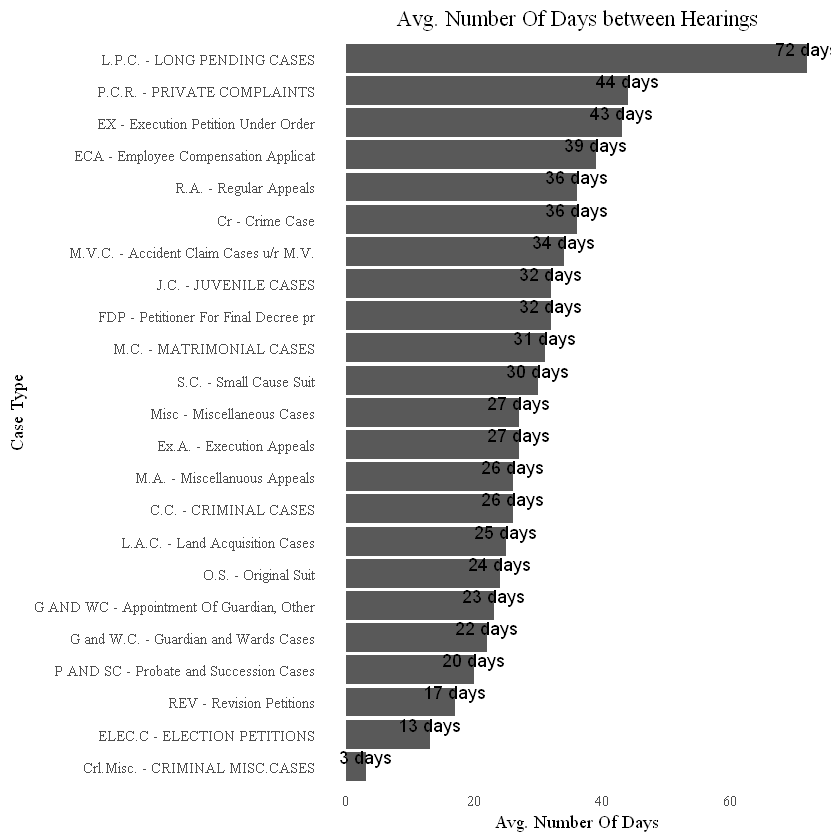

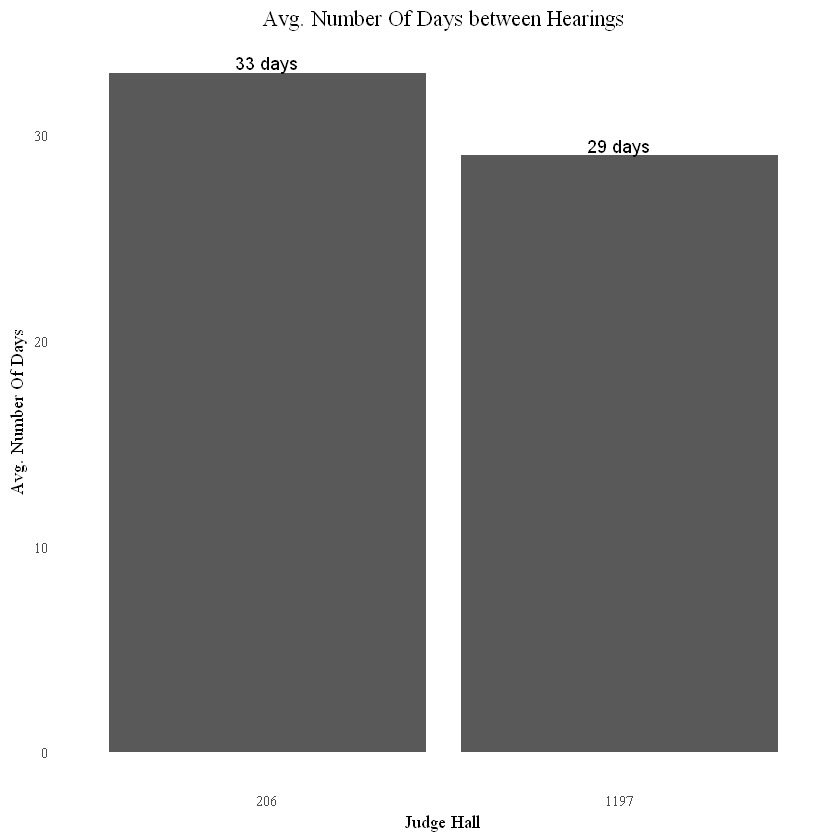

In [22]:
# Visualization 
p1 <- ggplot(data=group_by_attribute_case_type, aes(x= reorder(CaseType,MeanDays), y = MeanDays)) + 
geom_bar(position = 'dodge', stat='identity') +
geom_text(aes(label=comma(MeanDays)), position=position_dodge(width=0.9), vjust=-0.25)+
scale_y_continuous(labels = comma) +
coord_flip()+ 
labs(title="Avg. Number Of Days between Hearings",y = "Avg. Number Of Days", x= "Case Type")+
theme_tufte() +  # Tufte theme from ggfortify
theme(plot.title = element_text(hjust = .5), axis.ticks = element_blank()) +   # Centre plot title
scale_fill_brewer(palette = "Dark2") 

# Visualization 
p2 <- ggplot(data=group_by_attribute_judge_type, aes(x= reorder(CourtHallNumber.x,-MeanDays), y = MeanDays)) + 
geom_bar(position = 'dodge', stat='identity') +
geom_text(aes(label=comma(MeanDays)), position=position_dodge(width=0.9), vjust=-0.25)+
scale_y_continuous(labels = comma) +
labs(title="Avg. Number Of Days between Hearings",y = "Avg. Number Of Days", x= "Judge Hall")+
theme_tufte() +  # Tufte theme from ggfortify
theme(plot.title = element_text(hjust = .5), axis.ticks = element_blank()) +   # Centre plot title
scale_fill_brewer(palette = "Dark2") 

p1
p2